In [ ]:
import os
from os.path import exists, join, basename, splitext

################# Need to revert back to CUDA 10.0 ##################
# Thanks to http://aconcaguasci.blogspot.com/2019/12/setting-up-cuda-100-for-mxnet-on-google.html
#Uninstall the current CUDA version
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

#Download CUDA 10.0
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
#install CUDA kit dpkg
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0
#Slove libcurand.so.10 error
!wget --no-clobber http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
#-nc, --no-clobber: skip downloads that would download to existing files.
!apt install ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
!apt-get update
####################################################################

git_repo_url = 'https://github.com/TadasBaltrusaitis/OpenFace.git'
project_name = splitext(basename(git_repo_url))[0]
# clone openface
!git clone -q --depth 1 $git_repo_url

# install new CMake becaue of CUDA10
!wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
!tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local

# Get newest GCC
!sudo apt-get update
!sudo apt-get install build-essential 
!sudo apt-get install g++-8

#added 5/15/2022. Thanks to @weskhoo
!sudo apt-key del 7fa2af80
!sudo apt-key adv --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/3bf863cc.pub

# install python dependencies
!pip install -q youtube-dl

# Finally, actually install OpenFace
!cd OpenFace && bash ./download_models.sh && sudo bash ./install.sh

## Detect facial expressions 



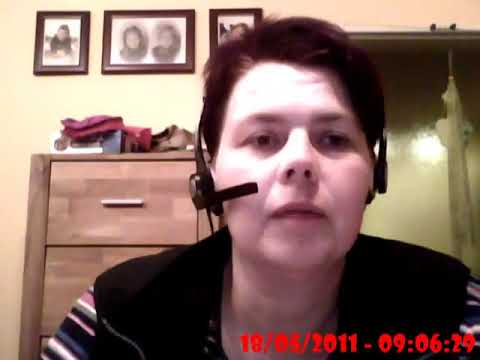

In [7]:
from IPython.display import YouTubeVideo

# Change the Youtube_ID with the link to your group's video.
YOUTUBE_ID = 'FtuUU-xGP50'

YouTubeVideo(YOUTUBE_ID)

In [8]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 10 video.mp4
# clear any previous outputs.
!rm -rf processed
# detect poses on the these 10 seconds.
!./OpenFace/build/bin/FaceLandmarkVidMulti -f video.mp4 -out_dir processed
# convert the result into MP4
!ffmpeg -y -loglevel info -i processed/video.avi output.mp4

[youtube] FtuUU-xGP50: Downloading webpage
[youtube] FtuUU-xGP50: Downloading MPD manifest
[download] Destination: youtube.mp4
[download] 100% of 1.20MiB in 00:18
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-l

 visualize the result:

In [9]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd, seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt 

# Load data
df = pd.read_csv('processed/video.csv')
# Remove empty spaces in column names.
df.columns = [col.replace(" ", "") for col in df.columns]
# Print few values of data.
print(f"Max number of frames {df.frame.max()}", f"\nTotal shape of dataframe {df.shape}")
df.head()

Max number of frames 300 
Total shape of dataframe (300, 714)


,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.98,1,0.014879,0.084439,-0.996318,-0.159824,0.063665,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,0,0.033,0.98,1,0.002111,0.095062,-0.995469,-0.163095,0.065448,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,0,0.067,0.98,1,0.001172,0.096198,-0.995362,-0.161800,0.067985,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,0,0.100,0.98,1,0.003171,0.095114,-0.995461,-0.161224,0.067358,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,0.133,0.98,1,-0.016523,0.081809,-0.996511,-0.155418,0.079180,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# See how many unique faces there are
print("Number of unique faces: ", len(df.face_id.unique()), "\nList of face_id's: ", df.face_id.unique())

Number of unique faces:  4 
List of face_id's:  [0 1 2 3]
